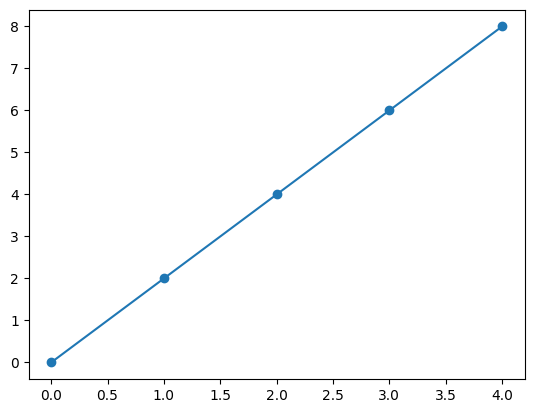

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

t = [0,1,2,3,4]
x = [0,2,4,6,8]

plt.scatter(t,x)
plt.plot(t,x)
plt.show()

In [2]:
def position(time):
    return 2*time

for i in t:
    print(f"at t = {i} position is {position(i)}")

at t = 0 position is 0
at t = 1 position is 2
at t = 2 position is 4
at t = 3 position is 6
at t = 4 position is 8


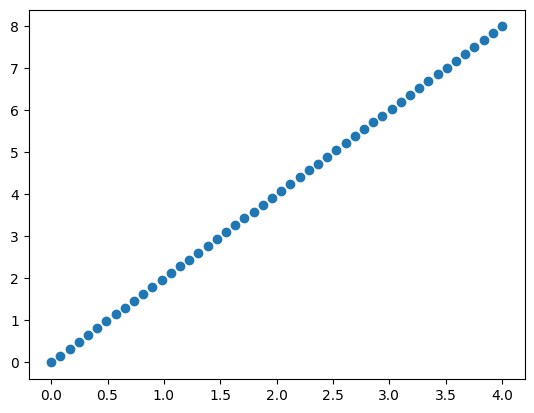

In [3]:
import numpy as np

t = np.linspace(0,4)
x = position(t)
plt.scatter(t,x)
plt.show()

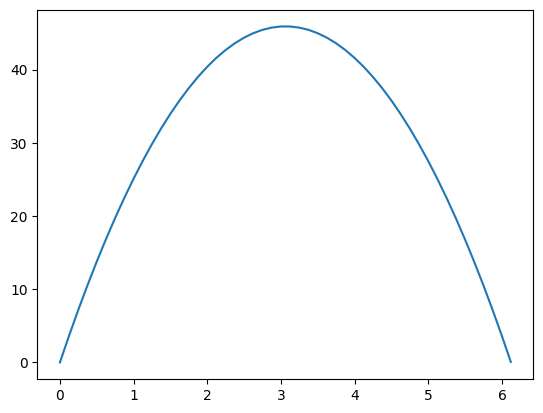

In [4]:
def position_b(time):
    return -4.9*time**2 + 30*time

t = np.linspace(0, 6.12)
z = position_b(t)
plt.plot(t,z)

In [5]:
def plot_continuous_func(function, v_min, v_max):
    t = np.linspace(v_min, v_max)
    x = function(t)
    plt.plot(x,t)

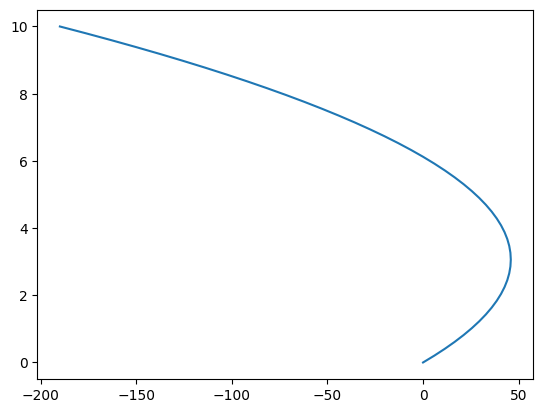

In [6]:
plot_continuous_func(position_b, 0, 10)
plt.show()

$$\dot{f}(t) = \lim_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$$

In [12]:
def derivative(f, t):
    delta_t = 0.00001
    return (f(t+delta_t)-f(t)) / delta_t

deriv_at_3_point_45 = derivative(position_b, 2)
print("The derivative at t = 3.45 is", deriv_at_3_point_45)

The derivative at t = 3.45 is 10.399951000295005


In [13]:
from helpers import process_data
from matplotlib import pyplot as plt

In [15]:
PARALLEL_PARK_DATA = process_data("parallel_park.pickle")

In [16]:
PARALLEL_PARK_DATA[:5]

[(0.0, 0, 0.0, 0.0),
 (0.0625, 0.0, 0.0, 1.9600000000000002),
 (0.125, -0.007656250000000001, 0.0, 1.9600000000000002),
 (0.1875, -0.022968750000000003, -0.0, 1.9600000000000002),
 (0.25, -0.045937500000000006, -0.0, 1.9600000000000002)]

In [17]:
timestamps = [row[0] for row in PARALLEL_PARK_DATA]
displacements = [row[1] for row in PARALLEL_PARK_DATA]

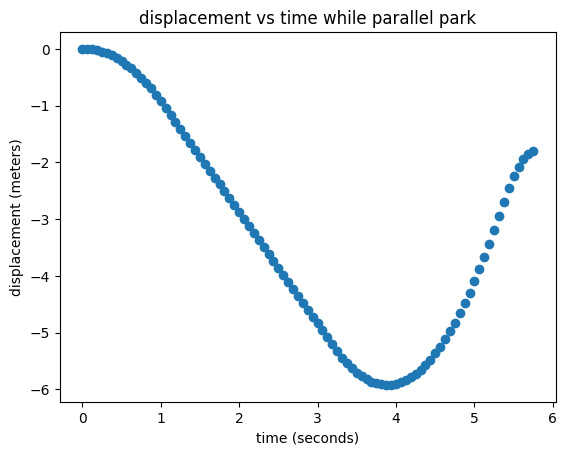

In [21]:
plt.title("displacement vs time while parallel park")
plt.xlabel("time (seconds)")
plt.ylabel("displacement (meters)")
plt.scatter(timestamps, displacements)
plt.show()

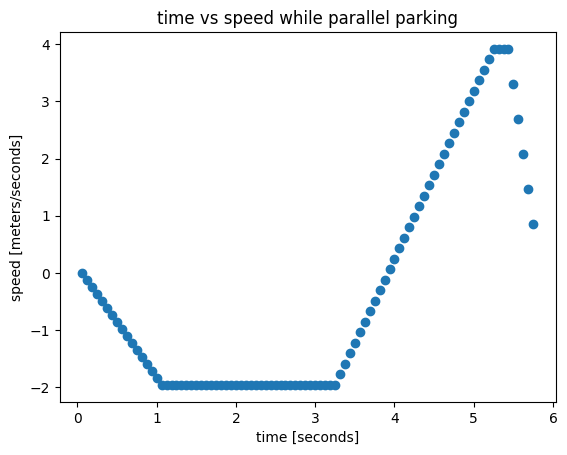

In [28]:
def calculate_speed(position_data, time_data):
    if len(position_data) != len(time_data):
        raise("positon data not equal to time data")
    
    previous_pos = position_data[0]
    previous_tm = time_data[0]
    speed = []
    
    for i in range(1, len(position_data)):
        current_pos = position_data[i]
        current_tm = time_data[i]
        
        delta_x = current_pos - previous_pos
        delta_t = current_tm - previous_tm
        
        current_sp = delta_x / delta_t
        speed.append(current_sp)
        
        previous_pos = current_pos
        previous_tm = current_tm
        
    return speed


speed_data = calculate_speed(displacements, timestamps)
plt.title("time vs speed while parallel parking")
plt.xlabel("time [seconds]")
plt.ylabel("speed [meters/seconds]")
plt.scatter(timestamps[1:], speed_data)